<a href="https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/00_QUICKSTART_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installation

In [ ]:
!pip install rapidae

This installs the latest stable version. If you want to have control over the code you can check the [execute_from_source_code](https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/execute_from_source_code.ipynb) notebook.

You will also need to install a backend framework.

**If you are executing this from colab you can skip this process**, Tensorflow, Pytorch and JAX are already installed.

#### Install tensorflow

In [ ]:
!python3 -m pip install tensorflow[and-cuda]

After installing tensorflow Keras 3 should be re-installed. This is a temporary step while TensorFlow is pinned to Keras 2, and will no longer be necessary after TensorFlow 2.16. The cause is that tensorflow==2.15 will overwrite your Keras installation with keras==2.15.

In [ ]:
!pip install --upgrade keras

#### Install pytorch

In [ ]:
!pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu118

#### Install JAX

In [ ]:
!pip install --upgrade pip
!pip install --upgrade "jax[cpu]" # CPU-only version
# pip install --upgrade "jax[cuda11_pip]" # NVIDIA GPU version

### Data

Let´s start loading some data.

You can list the available datasets with the ```list_datasets()``` function. We´ll keep adding more datasets.

In [2]:
from rapidae.data import list_datasets, load_dataset, load_MNIST

In [3]:
list_datasets()

['AtrialFibrillation', 'CMAPSS', 'MNIST', 'SineWave']

There are two options for loading a dataset:

1. Use the load_dataset function with the dataset name

In [4]:
data = load_dataset('MNIST')

2024-04-16 07:28:24 [INFO]: Downloading train-images-idx3-ubyte.gz...
2024-04-16 07:28:24 [INFO]: Downloading train-labels-idx1-ubyte.gz...
2024-04-16 07:28:24 [INFO]: Downloading t10k-images-idx3-ubyte.gz...
2024-04-16 07:28:24 [INFO]: Downloading t10k-labels-idx1-ubyte.gz...


2024-04-16 07:28:25 [INFO]: Deleting MNIST data...


2. Use the load_"dataset_name" function. 

In [5]:
data = load_MNIST()

2024-04-16 07:28:26 [INFO]: Downloading train-images-idx3-ubyte.gz...
2024-04-16 07:28:26 [INFO]: Downloading train-labels-idx1-ubyte.gz...
2024-04-16 07:28:26 [INFO]: Downloading t10k-images-idx3-ubyte.gz...
2024-04-16 07:28:26 [INFO]: Downloading t10k-labels-idx1-ubyte.gz...


2024-04-16 07:28:26 [INFO]: Deleting MNIST data...


All datasets have a "persistant" parameter. If set to True stores the data in a newly created "datasets" folder. By default it is set to False.

```
data = load_dataset('MNIST', persistant=True)
data = load_MNIST(persistant=True)
```

All datasets return a dictionary that can contain any of the following keys:
- x_train
- x_val
- x_test
- y_train
- y_val
- y_test

In [6]:
data.keys()

dict_keys(['x_train', 'y_train', 'x_test', 'y_test'])

Prepare data for training:
- Normalize data in the range [0,1]
- Flatten data -> in this case we are going to use an autoencoder with an encoder whose first layer is a Dense layer so it needs to have the following shape: (samples, features)

In [8]:
from keras import utils

# Normalize data and flatten images
x_train = data['x_train'].reshape(data['x_train'].shape[0], -1).astype("float32") / 255
x_test = data['x_test'].reshape(data['x_test'].shape[0], -1).astype("float32") / 255

input_dim = x_train.shape[1]

### Models

You can list the available models with the ```list_models()``` function.

Note however, that these are the base models, for a complete guide of the implemented models, please refer to the [documentation](https://rapidae.readthedocs.io/en/latest/) or to the [README](https://github.com/NahuelCostaCortez/rapidae/tree/main) of the official repo.

In [11]:
from rapidae.models import list_models

In [10]:
list_models()

['AE',
 'BASE',
 'BETA_VAE',
 'CAE',
 'RVAE',
 'RVE',
 'TIME_HVAE',
 'TIME_VAE',
 'VAE',
 'VQ_VAE']

Let´s build a vanilla autoencoder.

Each model needs typically an encoder and a decoder. You can select among the available architectures in the models module or provide your own implementation.

#### 1. Selecting an existing architecture

In [12]:
from rapidae.models import AE

Each model has (at least) the following parameters:

- input_dim (Union[Tuple[int, ...], None]): The dimensionality of the input data. Default is None. **Required parameter**.
    This typically is:
    - If time series: series_len, num_features
    - If image: width, height, num_channels
    - If the selected model uses a Dense layer as the first layer it should be the product of those dimensions. In this case, for instance, width=28, height=28, num_channels=1 therefore the input_dim is 28x28x1=784

    Each model is organized as follows:

    model (folder)

	>__init__.py

  	>encoder.py

    >decoder.py
        
    >model.py

    This parameter is necessary because if no encoder-decoder are specified, the class will try to instantiate the encoder-decoder contained in the same folder as the chosen model.

- latent_dim (int): The dimensionality of the latent space. Default is 2.
- encoder (BaseEncoder): An instance of BaseEncoder. Default is None.
- decoder (BaseDecoder): An instance of BaseDecoder. Default is None.

You can notice that the input_dim is the only required parameter, which means you can instantiate a model just by doing:

In [13]:
model = AE(input_dim=input_dim)

2024-04-16 07:31:24 [INFO]: Trying to set encoder and decoder from child class...
2024-04-16 07:31:24 [WARNING]: No encoder found in ae, using default encoder with layers_conf=[512]...
2024-04-16 07:31:24 [WARNING]: No decoder found in ae, using default decoder with layers_conf=[512]...


You can also select an existing architecture. 

In [14]:
from rapidae.models.base import VanillaEncoder, VanillaDecoder

You can pass the encoder-decoder classes, the AE model will initialize them

In [15]:
latent_dim = 2
model = AE(input_dim=input_dim, encoder=VanillaEncoder, decoder=VanillaDecoder)

2024-04-16 07:40:31 [INFO]: Using provided encoder
2024-04-16 07:40:31 [INFO]: Encoder is a class, initializing...
2024-04-16 07:40:31 [INFO]: Using provided decoder
2024-04-16 07:40:31 [INFO]: Decoder is a class, initializing...


Or you can just initialize them yourself

In [16]:
latent_dim = 2
model = AE(input_dim=input_dim, encoder=VanillaEncoder(input_dim, latent_dim), decoder=VanillaDecoder(input_dim, latent_dim))

2024-04-16 07:40:45 [INFO]: Using provided encoder
2024-04-16 07:40:45 [INFO]: Using provided decoder


#### 2. Providing a custom architecture

Let's say you want to try your own model architecture, then you would have to define it yourself, here is an example:

In [17]:
from rapidae.models.base import BaseEncoder, BaseDecoder
from keras.layers import Dense

class Custom_Encoder(BaseEncoder):
    def __init__(self, input_dim, latent_dim, **kwargs): # you can add more arguments, but al least these are required
        BaseEncoder.__init__(self, input_dim=input_dim, latent_dim=latent_dim)

        self.layer_1 = Dense(300)
        self.layer_2 = Dense(150)
        self.layer_3 = Dense(self.latent_dim)

    def call(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.layer_3(x)
        return x

class Custom_Decoder(BaseDecoder):
    def __init__(self, input_dim, latent_dim, **kwargs): # you can add more arguments, but al least these are required
        BaseDecoder.__init__(self, input_dim=input_dim, latent_dim=latent_dim)

        self.layer_1 = Dense(self.latent_dim)
        self.layer_2 = Dense(self.input_dim)

    def call(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        return x

Now instantiate the model as before feeding the custom encoder and decoder

In [18]:
model = AE(input_dim=input_dim, encoder=Custom_Encoder, decoder=Custom_Decoder)

2024-04-16 07:41:45 [INFO]: Using provided encoder
2024-04-16 07:41:45 [INFO]: Encoder is a class, initializing...
2024-04-16 07:41:45 [INFO]: Using provided decoder
2024-04-16 07:41:45 [INFO]: Decoder is a class, initializing...


You can also provide a custom model. This is specially useful if you want to implement a customized loss function.

In [19]:
from rapidae.models.base import BaseAE
from keras.ops import mean
from keras.losses import mean_squared_error

class CustomModel(BaseAE):
    def __init__(self, input_dim, latent_dim, encoder, decoder):
        BaseAE.__init__(
            self,
            input_dim=input_dim,
            latent_dim=latent_dim,
            encoder=encoder,
            decoder=decoder
        )
        
    def call(self, x):
        # IMPLEMENT FORWARD PASS
        x = self.encoder(x)
        x = self.decoder(x)

        return x
      
    def compute_loss(self, x=None, y=None, y_pred=None, sample_weight=None):
        '''
        Computes the loss of the model.
        x: input data
        y: target data
        y_pred: predicted data (output of call)
        sample_weight: Optional array of the same length as x, containing weights to apply to the model's loss for each sample
        '''
        # IMPLEMENT LOSS FUNCTION
        loss = mean(mean_squared_error(x, y_pred))

        return loss

In [20]:
customModel = CustomModel(input_dim=input_dim, latent_dim=2, encoder=Custom_Encoder, decoder=Custom_Decoder)

2024-04-16 07:42:10 [INFO]: Using provided encoder
2024-04-16 07:42:10 [INFO]: Encoder is a class, initializing...
2024-04-16 07:42:10 [INFO]: Using provided decoder
2024-04-16 07:42:10 [INFO]: Decoder is a class, initializing...


### Training

The model is a keras model, therefore you can directly use the ```.fit``` method.

The training pipeline allows you to configure training settings like managing callbacks or reloading the best parameters after tranining.

It has the following parameters:

- name (str): Name of the pipeline.
- model (BaseAE): Model to be trained.
- output_dir (str): Output directory for saving the trained model. If not specified, a new directory "output_dir/name_YYY-MM-DD_HH-MM-SS" is created. Defaults to "output_dir".
- optimizer (str): Name of the optimizer. Currently only 'adam' is supported.
- learning_rate (float): Learning rate for the optimizer.
- batch_size (int): Batch size for training.
- num_epochs (int): Number of training epochs.
- callbacks (list, optional): List of Keras callbacks. If None, EarlyStopping and ModelCheckpoint are created. Defaults to None.
- save_model (bool, optional): Flag to save the trained model. Defaults to True. Otherwise, the output directory is removed.
- run_eagerly (bool, optional): Flag to run the model eagerly. Defaults to False.
- verbose (int, optional): Verbosity mode. 0 will show no output, 1 will show a progress bar, and 2 will just mention the number of epoch. Defaults to 2.

In [16]:
from rapidae.pipelines import TrainingPipeline

In [18]:
pipe = TrainingPipeline(name='vanilla_autoencoder', learning_rate=0.001,
                        model=model, num_epochs=20, batch_size=128)

trained_model = pipe(x=x_train)

2024-04-15 19:35:15 [INFO]: +++ vanilla_autoencoder +++
2024-04-15 19:35:15 [INFO]: Creating folder in ./output_dir/vanilla_autoencoder_2024-04-15_19-35
2024-04-15 19:35:15 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: False
	Callbacks set: ['EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/20

Epoch 1: loss improved from inf to 0.06665, saving model to ./output_dir/vanilla_autoencoder_2024-04-15_19-35/model.weights.h5
469/469 - 3s - 7ms/step - loss: 0.0666
Epoch 2/20

Epoch 2: loss improved from 0.06665 to 0.05768, saving model to ./output_dir/vanilla_autoencoder_2024-04-15_19-35/model.weights.h5
469/469 - 1s - 1ms/step - loss: 0.0577
Epoch 3/20

Epoch 3: loss improved from 0.05768 to 0.05702, saving model to ./output_dir/vanilla_autoencoder_2024-04-15_19-35/model.weights.h5
469/469 - 1s - 1ms/step - loss: 0.0570
Epoch 4/20

Epoch 4: loss improved from 0.05702 to 0.05658, saving model to ./output_dir/vanilla_autoencoder_2024-04-15_19-35/model.weights.h5
469/469 - 1s - 1ms/step - loss: 0.0566
Epoch 5/20

Epoch 5: loss improved from 0.05658 to 0.05628, saving model to ./output_dir/vanilla_autoencoder_2024-04-15_19-35/model.weights.h5
469/469 - 1s - 3ms/step - loss: 0.0563
Epoch 6/20

Epoch 6: loss improved from 0.05628 to 0.05611, saving model to ./output_dir/vanil

2024-04-15 19:35:32 [INFO]: Restoring best model
2024-04-15 19:35:32 [INFO]: Best model restored


You can use the plot_training_history method to plot the evolution of the metrics involved during training.

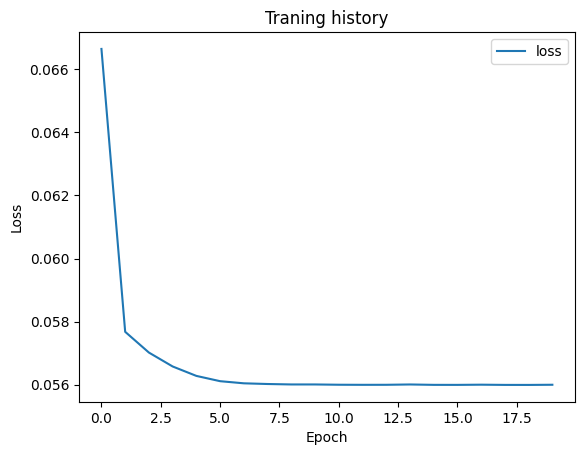

In [19]:
pipe.plot_training_history()

### Evaluation

Depending on what you are training the model for you can find different evaluations. For this example, we are going to focus on the decoder´s reconstructions as well as in the the visual evaluation of the latent space.

In [20]:
from rapidae.evaluate import plot_reconstructions, plot_latent_space

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


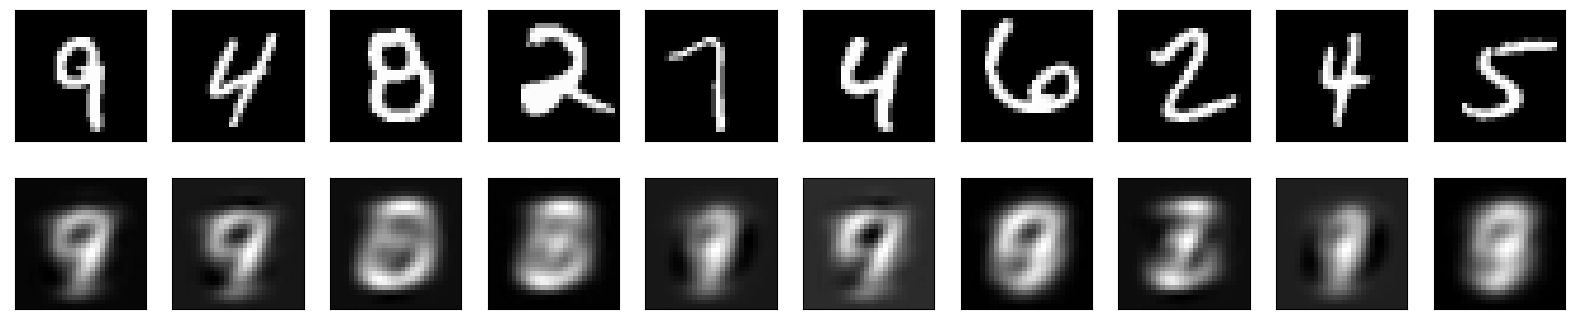

In [21]:
outputs = trained_model.predict(x_test)

plot_reconstructions(x_test, outputs['x_recon'])

It is clear that the model needs more training!

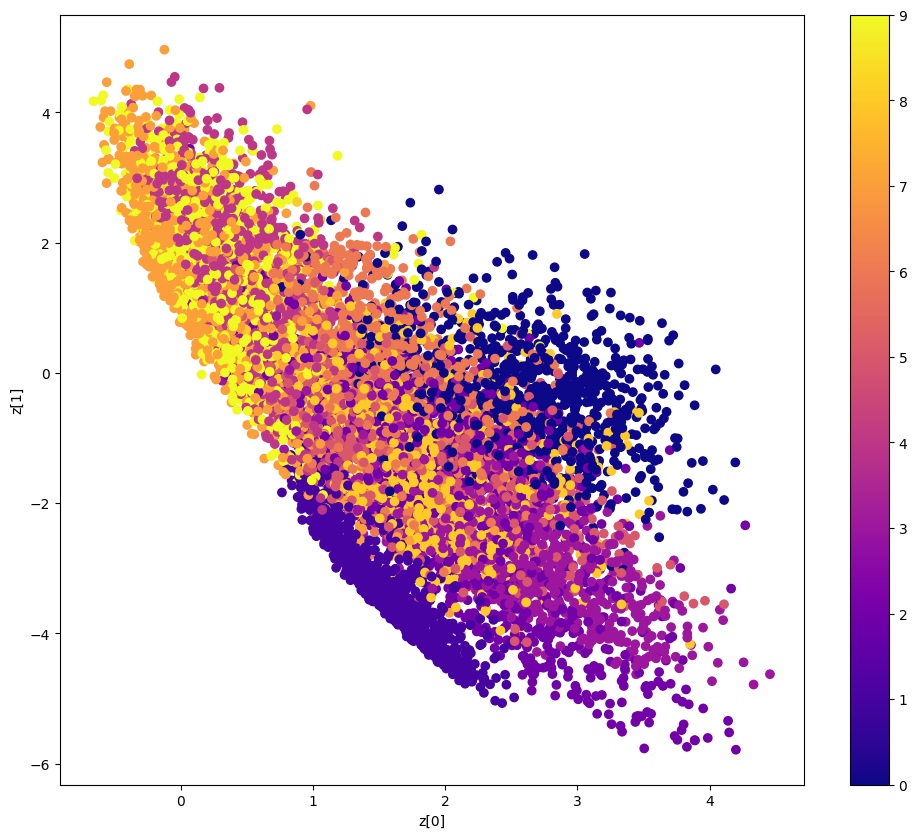

In [22]:
plot_latent_space(outputs['z'], data['y_test'])